# NTSB Data Analysis
Exploratory Data Analysis and Answering Questions

## Importing Libraries, Importing Data

In [1]:
# Import libraries as necessary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Find local data files and print their paths.

for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/AviationData.csv
./data/USState_Codes.csv


In [3]:
# Read the csv into a pandas dataframe

avdata = pd.read_csv('./data/AviationData.csv', encoding='latin1', dtype='unicode')
avdata.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980


## Exploratory Data Analysis

Now that the data has been imported, let's try to understand it.

In [4]:
# See what the columns of the dataframe are

avdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50132 non-null  object
 9   Airport.Name            52704 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87507 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

At a glance through the columns, some preliminary questions about the data arise.

- What are differences in accidents operating under Part 91 vs Commercially?
- Do accidents change over time? Frequency, reason, # deaths
- During what phase of flight do most accidents occur? (part 91 vs commercial)
- VMC or IMC for 91/commercial?

In [5]:
# Let's see where there is missing data

avdata.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [6]:
# Create a dataframe that I can edit and change without modifying the original

df = avdata.copy()

### Data Cleaning

Because this is a very large dataset, I think the best way to go about this is to pull columns into a new dataframe every time i need specific information to graph.

List of operations in data cleaning section:
- Standardize FAR.Description
- Include a new Year column in the df

In [7]:
df['FAR.Description'].value_counts()

FAR.Description
091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                     

In [8]:
def standardize_far_parts(df):
    """
    Part under which flight is operating represented in a few different ways
    This function standardizes that data
    
    params: 
        df (pandas DataFrame): dataframe containing FAR.Description column
        
    returns:
        (pandas DataFrame): dataframe with cleaned info
    """
    
    df_clean = df.copy()
    
    patterns = {
        r'^091$': '91',
        r'^Part 91: General Aviation$': '91',
        r'^Part 121: Air Carrier$': '121',
        r'^Part 135: Air Taxi & Commuter$': '135'
    }
    
    df_clean['FAR.Description'] = df_clean['FAR.Description'].replace(patterns, regex=True)
    
    return df_clean


In [9]:
# Use the standardize function!

df = standardize_far_parts(df)

In [10]:
# Add a Year column

df['Year'] = pd.to_datetime(df['Event.Date']).dt.year

### Graphs!

List of graphs:
- Accidents per year bar chart
- Accidents per phase of flight bar chart
- VMC vs IMC Pie Chart
- Accidents related to fuel pie chart
- Accidents by State bar chart

#### Accidents per Year Bar Chart

In [11]:
# Created a new df grouping years together and counting the number of entries per year.

df_year_acc = df.groupby('Year').size().reset_index(name='Accidents')


In [12]:
# There are only a few entries in the years below 1982. Let's strip those so the data is cleaner

df_year_acc = df_year_acc[df_year_acc['Year'] > 1981]

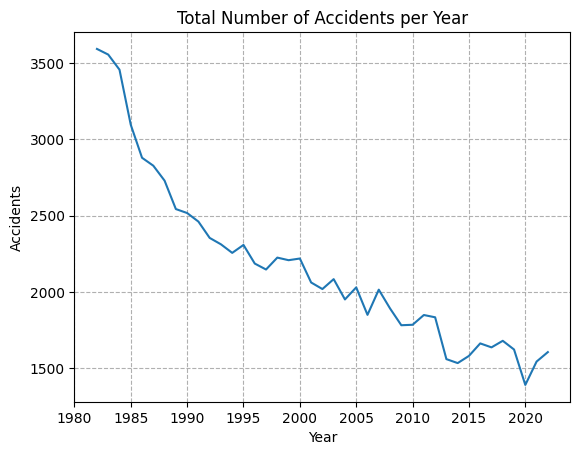

In [13]:
fig, ax = plt.subplots()
ax.plot(df_year_acc["Year"], df_year_acc["Accidents"])
ax.set_title("Total Number of Accidents per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Accidents")
ax.grid(visible=True, linestyle='--')
plt.show()

#### Accidents per Phase of Flight Bar Chart

In [14]:
# Lets find out during which phase of flight accidents occur
# Grouping number of accidents by phase of flight

df_phase_acc = df.groupby('Broad.phase.of.flight').size().reset_index(name='Accidents')
df_phase_acc = df_phase_acc.sort_values(by='Accidents', ascending=False)


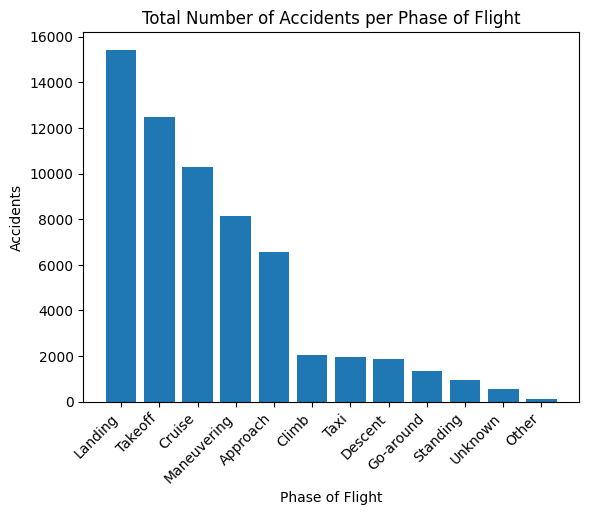

In [15]:
fig, ax = plt.subplots()
ax.bar(df_phase_acc["Broad.phase.of.flight"], df_phase_acc["Accidents"])
ax.set_title("Total Number of Accidents per Phase of Flight")
ax.set_xlabel("Phase of Flight")
ax.set_ylabel("Accidents")
plt.xticks(rotation=45, ha='right')
plt.show()

#### VMC vs IMC Pie Chart

In [16]:
df_MC_acc = df.groupby('Weather.Condition').size().reset_index(name='Accidents')
df_MC_acc = df_MC_acc[(df_MC_acc['Weather.Condition'] != 'Unk') & (df_MC_acc['Weather.Condition'] != 'UNK')]

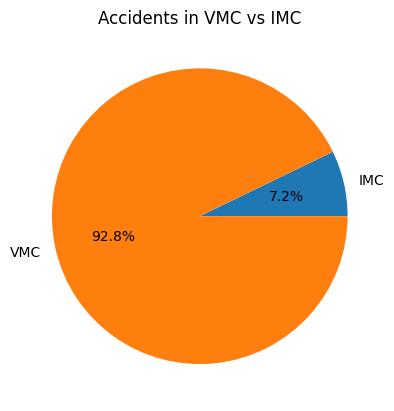

In [17]:
fig, ax = plt.subplots()
ax.pie(df_MC_acc['Accidents'], labels=df_MC_acc['Weather.Condition'], autopct='%1.1f%%')
ax.set_title('Accidents in VMC vs IMC')
plt.show()

#### Accidents that Mention Fuel Pie Chart

In [18]:
df.loc[df['Report.Status'].str.contains('Probable Cause', case=False, na=False), 'Report.Status'] = np.nan
df.loc[df['Report.Status'].str.contains('Foreign', case=False, na=False), 'Report.Status'] = np.nan
df['relatedToFuel'] = df['Report.Status'].str.contains('fuel', case=False)

In [19]:
df_fuelCaused_acc = df.groupby('relatedToFuel').size().reset_index(name='Accidents')

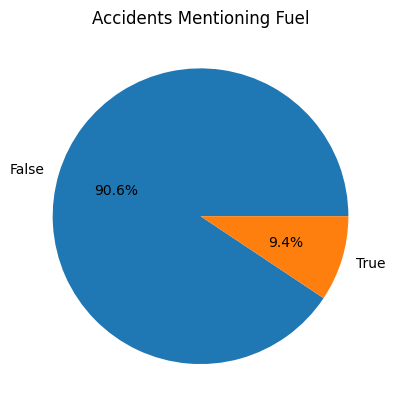

In [20]:
fig, ax = plt.subplots()
ax.pie(df_fuelCaused_acc['Accidents'], labels=df_fuelCaused_acc['relatedToFuel'], autopct='%1.1f%%')
ax.set_title('Accidents Mentioning Fuel')
plt.show()

#### Accidents by State Bar Graph

Let's take a look at only flights within the United States, then sort accidents by state

In [21]:
# Let's first make a new column called "State" where we slice the location string

df['State'] = df['Location'].str[-2:]

In [22]:
# Make a function that tests if the State is legit!

valid_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

def checkIfState(state):
    """
    Takes a dataframe and removes lines if their state column doesn't have a valid state
    
    args:
        state (string): whatever's in the dataframe under the "state" column
    
    returns:
        state if the state is legit
        NaN (replace it with nothing) if it's not a legit state
    """
    if state in valid_state_codes:
        return state
    else:
        return np.nan

In [23]:
# Use the check state function

df['State'] = df['State'].apply(checkIfState)

In [24]:
# Make a United States database

usdb = df[df['Country'] == 'United States']

In [25]:
# Make 2 more databases:
# usdb_acc_by_state lists number of accidents by state
# top_10_states takes the top 10 and makes it easier to plot

usdb_acc_by_state = usdb.groupby('State').size().reset_index(name='Accidents') # group by number of accidents per state
usdb_acc_by_state = usdb_acc_by_state.dropna() # drop n/a values
usdb_acc_by_state = usdb_acc_by_state.sort_values(by='Accidents', ascending=False) # Sort them by number of accidents
top_10_states = usdb_acc_by_state.head(10) # grab the top 10 states so we can plot

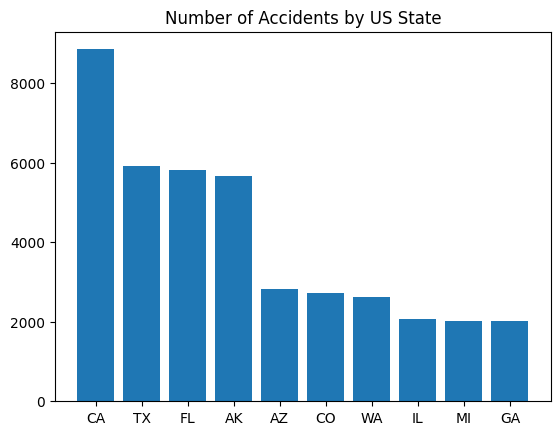

In [26]:
fig, ax = plt.subplots()
ax.bar(top_10_states['State'], top_10_states['Accidents'])
ax.set_title('Number of Accidents by US State')
plt.show()

### Looking at FAR Operating Parts

The number of accidents listed under Part 91 General Aviation (GA) operations is much higher than that of Part 121 Airline Operations and Part 135 Commercial Private Operations. It speaks to safety measures that have been implemented in pilot training and in airline operations in general, but leaves this analysis with significantly less data to analyze. Here, I will still see what comparisons can be made, while keeping in mind the disparity in the size of available data.

#### Cleaning Data

In [27]:
# Let's take a look at part 91 (GA), part 121 (airlines), part 135 (private commercial)

# Make a function that tests if the FAR part is 91, 121, 135!

valid_far_parts = [
    '91', '121', '135'
]

def checkIfRightFAR(part):
    """
    Takes a dataframe and removes lines if their FAR part isn't what I'm looking for
    
    args:
        part (string): whatever's in the dataframe under the "FAR.Description" column
    
    returns:
        part if the part is legit
        NaN (replace it with nothing) if it's not the part i'm looking for
    """
    if part in valid_far_parts:
        return part
    else:
        return np.nan

In [28]:
usdb_far_parts = usdb.copy()
usdb_far_parts['FAR.Description'] = usdb_far_parts['FAR.Description'].apply(checkIfRightFAR) # Grabs only 91, 121, 135
usdb_far_parts['FAR.Description'] = usdb_far_parts['FAR.Description'].dropna() # drops n/a values

In [29]:
"""
Fatality data is listed in two ways: Non-Fatal, and Fatal(n) where n is the number of fatalities. 
I will strip (n) from Fatal and only have the column list Fatal or Non-Fatal
"""

def cleanFatal(entry):
    """
    Changes entries in Injury.Severity column to list only fatal or non-fatal
    
    args: 
        entry (str) whatever is listed under Injury.Severity
    
    returns:
        entry (str) non-fatal if non-fatal
        "Fatal" (str) if Fatal(n)
    """
    if isinstance(entry, str):   
        if entry == "Non-Fatal":
            return entry
        elif "Fatal" in entry:
            return "Fatal"
    return np.nan

In [30]:
usdb_far_parts['Injury.Severity'] = usdb_far_parts['Injury.Severity'].apply(cleanFatal) # cleans up fatal
usdb_far_parts['Injury.Severity'] = usdb_far_parts['Injury.Severity'].dropna() # drops n/a values

In [31]:
# Create dataframe for each FAR Part
usdb_91 = usdb_far_parts[usdb_far_parts['FAR.Description'] == '91']
usdb_121 = usdb_far_parts[usdb_far_parts['FAR.Description'] == '121']
usdb_135 = usdb_far_parts[usdb_far_parts['FAR.Description'] == '135']

#### Accidents per FAR Part

In [32]:
usdb_far_parts_num = usdb_far_parts.groupby('FAR.Description').size().reset_index(name='Count')

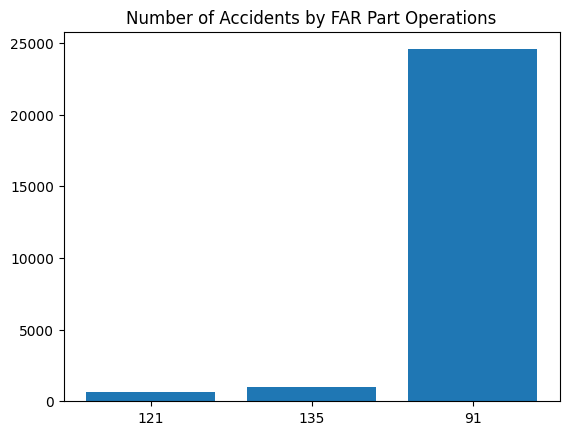

In [33]:
fig, ax = plt.subplots()
ax.bar(usdb_far_parts_num['FAR.Description'], usdb_far_parts_num['Count'])
ax.set_title('Number of Accidents by FAR Part Operations')
plt.show()

#### VMC vs IMC for each FAR Part

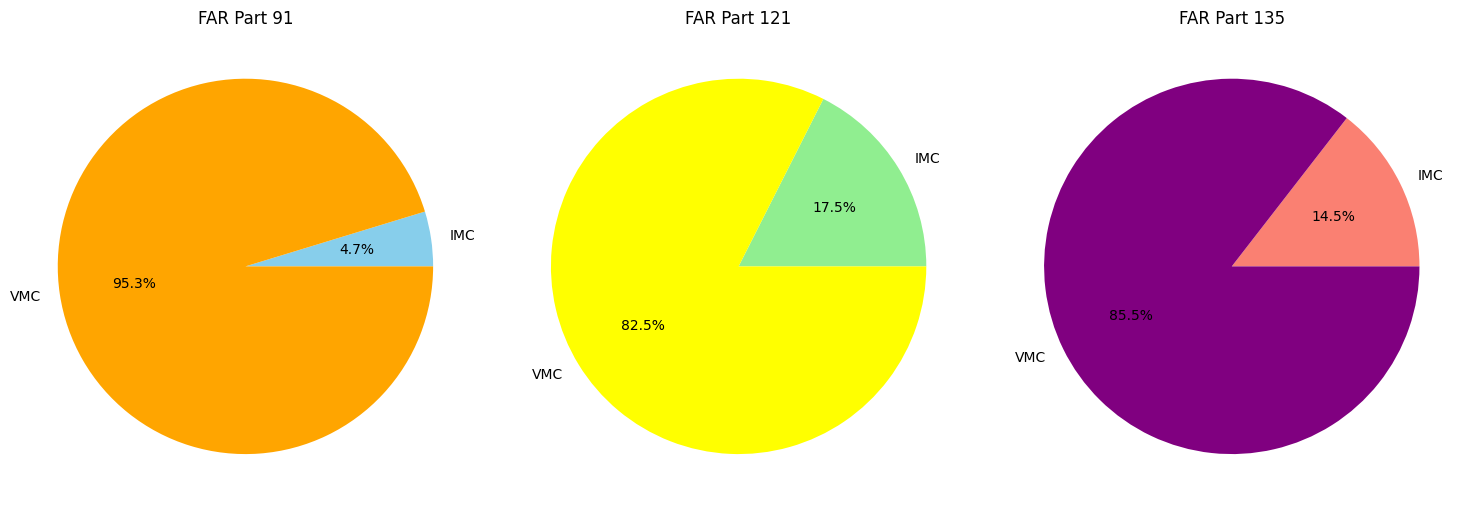

In [34]:
# Create dataframe containing counts of VMC/IMC conditions for each FAR Part
usdb_91_wx = usdb_91.groupby('Weather.Condition').size().reset_index(name='Count')
usdb_121_wx = usdb_121.groupby('Weather.Condition').size().reset_index(name='Count')
usdb_135_wx = usdb_135.groupby('Weather.Condition').size().reset_index(name='Count')

# Get rid of unknown wx conditions
usdb_91_wx = usdb_91_wx[(usdb_91_wx['Weather.Condition'] != 'Unk') & (usdb_91_wx['Weather.Condition'] != 'UNK')]
usdb_121_wx = usdb_121_wx[(usdb_121_wx['Weather.Condition'] != 'Unk') & (usdb_121_wx['Weather.Condition'] != 'UNK')]
usdb_135_wx = usdb_135_wx[(usdb_135_wx['Weather.Condition'] != 'Unk') & (usdb_135_wx['Weather.Condition'] != 'UNK')]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for FAR Part 91
axes[0].pie(usdb_91_wx['Count'], labels=usdb_91_wx['Weather.Condition'], autopct='%1.1f%%', colors=['skyblue', 'orange', 'pink'])
axes[0].set_title('FAR Part 91')

# Pie chart for FAR Part 121
axes[1].pie(usdb_121_wx['Count'], labels=usdb_121_wx['Weather.Condition'], autopct='%1.1f%%', colors=['lightgreen', 'yellow'])
axes[1].set_title('FAR Part 121')

# Pie chart for FAR Part 135
axes[2].pie(usdb_135_wx['Count'], labels=usdb_135_wx['Weather.Condition'], autopct='%1.1f%%', colors=['salmon', 'purple', 'lightblue'])
axes[2].set_title('FAR Part 135')

# Adjust layout
plt.tight_layout()
plt.show()

#### During which phase of flight do accidents occur, GA vs Airlines vs Private Commercial

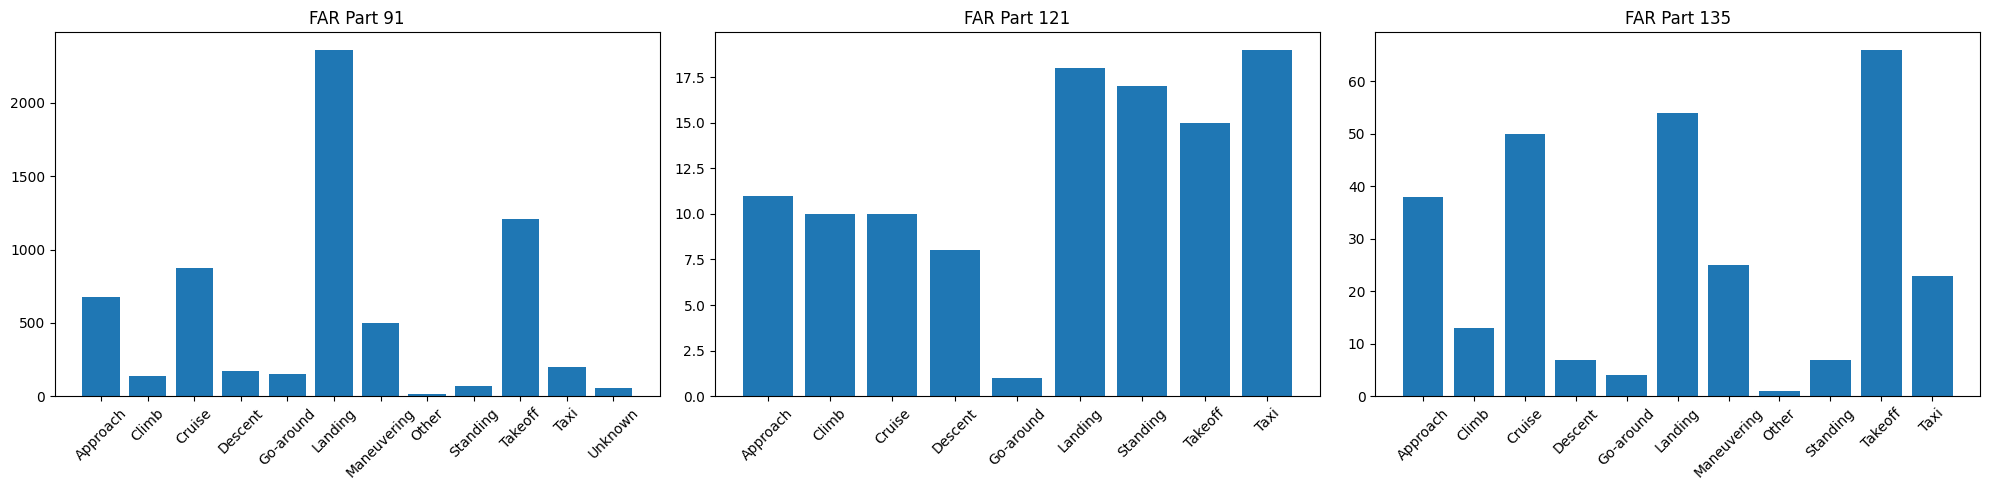

In [35]:
# Create dataframe containing counts of phase of flight for each FAR Part
usdb_91_phase = usdb_91.groupby('Broad.phase.of.flight').size().reset_index(name='Count')
usdb_121_phase = usdb_121.groupby('Broad.phase.of.flight').size().reset_index(name='Count')
usdb_135_phase = usdb_135.groupby('Broad.phase.of.flight').size().reset_index(name='Count')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Pie chart for FAR Part 91
axes[0].bar(usdb_91_phase['Broad.phase.of.flight'], usdb_91_phase['Count'])
axes[0].set_title('FAR Part 91')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart for FAR Part 121
axes[1].bar(usdb_121_phase['Broad.phase.of.flight'], usdb_121_phase['Count'])
axes[1].set_title('FAR Part 121')
axes[1].tick_params(axis='x', rotation=45)

# Pie chart for FAR Part 135
axes[2].bar(usdb_135_phase['Broad.phase.of.flight'], usdb_135_phase['Count'])
axes[2].set_title('FAR Part 135')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

#### Fatal vs. Non-Fatal per part

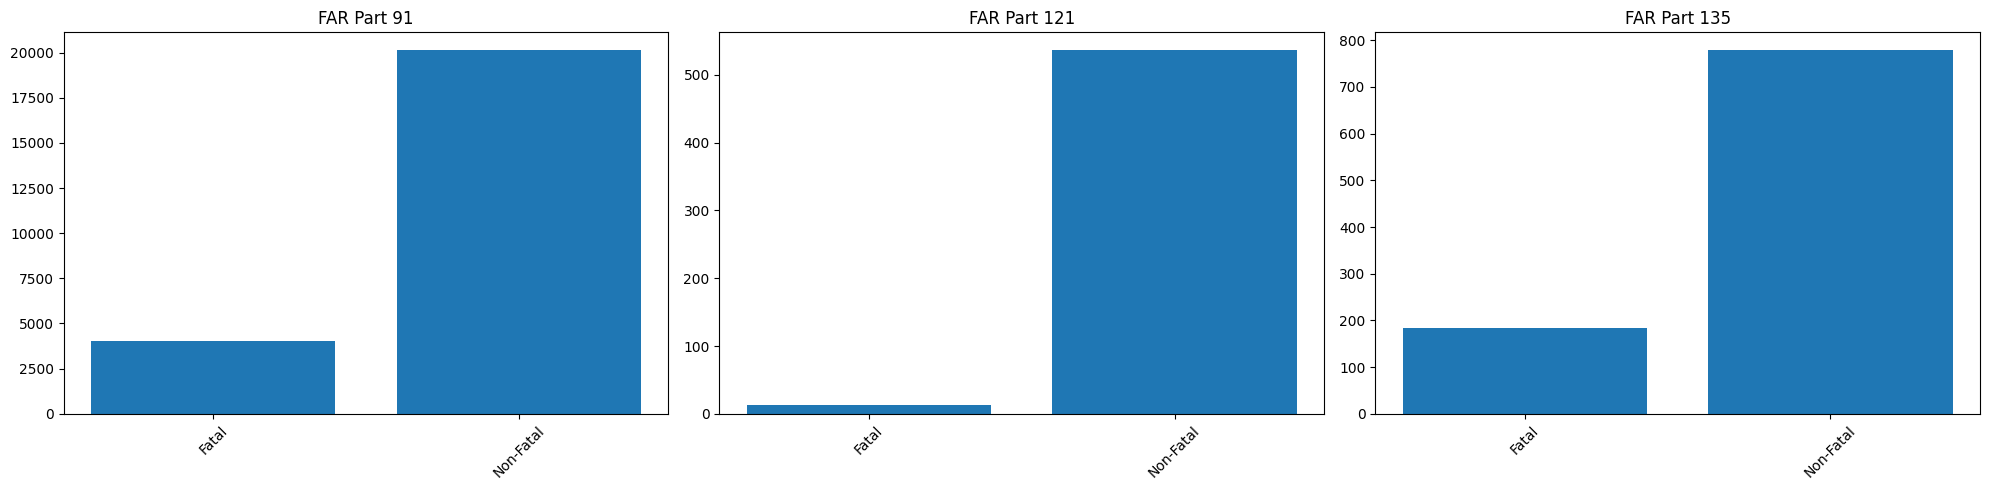

In [36]:
# Create dataframe containing counts of fatalities for each FAR Part
usdb_91_fatal = usdb_91.groupby('Injury.Severity').size().reset_index(name='Count')
usdb_121_fatal = usdb_121.groupby('Injury.Severity').size().reset_index(name='Count')
usdb_135_fatal = usdb_135.groupby('Injury.Severity').size().reset_index(name='Count')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Pie chart for FAR Part 91
axes[0].bar(usdb_91_fatal['Injury.Severity'], usdb_91_fatal['Count'])
axes[0].set_title('FAR Part 91')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart for FAR Part 121
axes[1].bar(usdb_121_fatal['Injury.Severity'], usdb_121_fatal['Count'])
axes[1].set_title('FAR Part 121')
axes[1].tick_params(axis='x', rotation=45)

# Pie chart for FAR Part 135
axes[2].bar(usdb_135_fatal['Injury.Severity'], usdb_135_fatal['Count'])
axes[2].set_title('FAR Part 135')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()